In [6]:
# Import Python libraries
import pandas as pd # df handling
import numpy as np # for handling numerical functions

# For matplotlib
import matplotlib
import matplotlib.pyplot as plt # for plotting

import seaborn as sns # fancy plots

# Import scikit-learn
import sklearn
from sklearn.impute import SimpleImputer # replace nan data
from sklearn.decomposition import PCA # principle component analysis
from sklearn.model_selection import train_test_split # train test split data
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.ensemble import RandomForestClassifier # load rf classifier
from sklearn.metrics import matthews_corrcoef, f1_score # metrics for MCC, F1 score

# Import SciPy
import scipy
from scipy.stats import ttest_rel, ttest_ind # import paired and unpaired t-tests

# import rdkit libraries
import rdkit
from rdkit import Chem
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors



In [7]:
# Chceck python version
import sys
print("Python version:", sys.version)

# Display versions of python libraries
print('Pandas library version:', pd.__version__)
print('NumPy library version:', np.__version__)
print('Matplotlib library version:', matplotlib.__version__)
print('Seaborn library version:', sns.__version__)
print('Scikit-learn library version:', sklearn.__version__)
print('SciPy library version:', scipy.__version__)
print('RDKit library version:', rdkit.__version__)

Python version: 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]
Pandas library version: 2.2.3
NumPy library version: 2.1.2
Matplotlib library version: 3.9.2
Seaborn library version: 0.13.2
Scikit-learn library version: 1.5.2
SciPy library version: 1.14.1
RDKit library version: 2024.09.5


In [8]:
# extract tabulated datasets from files
breast_cancer = pd.read_csv("breast-cancer.csv")
blood_brain_barrier = pd.read_excel("BBBP.xlsx")

Basic EDA and data preprocessing for breast cancer dataset

In [6]:
breast_cancer # view data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [7]:
# checking if dataset needs to be cleaned
print("NaNs:",breast_cancer.isna().sum().sum()) # check dataframe for nan values
print("Duplicate Rows:", breast_cancer.duplicated().sum()) # check for duplicate data

NaNs: 0
Duplicate Rows: 0


In [8]:
print(breast_cancer.shape) # print shape of data
breast_cancer.describe() # provide metrics of feature data

(569, 32)


id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [9]:
# Label extraction
breast_cancer_labels = breast_cancer['diagnosis']
# Feature extraction
breast_cancer_features = breast_cancer.copy()
# create a table containing only the features
breast_cancer_features = breast_cancer_features.drop(columns=['id', 'diagnosis'])
print(breast_cancer_features.shape)
breast_cancer_features.head(10) # preview feature table

(569, 30)


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760         0.30010              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.28390         0.24140              0.10520         0.2597   
4           0.13280         0.19800              0.10430         0.1809   
5           0.17000         0.15780              0.08089         0.2087   
6           0.10900         0.11270              0.07400         0.1794   
7           0.16450         0.09366              0.05985         0.2196   
8           0.19320         0.18590              0.09353         0.2350   
9           0.23960         0.22730              0.08543         0.2030   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   
5                 0.07613  ...         15.47          23.75           103.40   
6                 0.05742  ...         22.88          27.66           153.20   
7                 0.07451  ...         17.06          28.14           110.60   
8                 0.07389  ...         15.49          30.73           106.20   
9                 0.08243  ...         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9      

Basic and preprocessing EDA for blood brain barrier dataset

In [10]:
blood_brain_barrier # show general shape of dataset

Unnamed: 0                                             SMILES  \
0             0  c1cc(F)ccc1Cn(c(c23)cccc2)c(n3)N(CC4)CCC4n(c5)...   
1             1    c1cc(F)ccc1Cn(c(c23)cccc2)c(n3)[C@@H]4CCCN(C)C4   
2             2  CC1CCN(CC1)C(=O)c(c2)ccc3n(CC=C)c(c4c23)CCN(C4...   
3             3                                             ClCCCl   
4             4                      c1cccc(c1C23C)C(N3)Cc4c2cccc4   
..          ...                                                ...   
600         600  c1nc(C)nc(N)c1CN(C=O)C(\C)=C(SSC(C)C)\CCOC(=O)...   
601         601                            Cc(c1)ccc(c1C)NC2=NCCN2   
602         602                OC[C@@H]1CC[C@H](O1)n(c(n2)=O)ccc2N   
603         603        N=[N+]=NC(C1CO)CC(O1)n(c2)c(=O)[nH]c(=O)c2C   
604         604    C1=CC(C)=CN(C12)C(CC(=O)N(C)C)=C(N2)c(cc3)ccc3C   

            Name  logBB        B/P Class  
0              1   0.32   2.089296  BBB+  
1              2   0.43   2.691535  BBB+  
2              5  -0.13   0.741310  BBB+  
3             11  -0.14   0.724436  BBB+  
4            120   1.11  12.882496  BBB+  
..           ...    ...        ...   ...  
600    TiPr-DCKA  -0.57   0.269153  BBB-  
601        TZ-14  -1.30   0.050119  BBB-  
602  zalcitabine  -1.50   0.031623  BBB-  
603   zidovudine  -0.72   0.190546  BBB-  
604     zolpidem  -0.54   0.288403  BBB-  

[605 rows x 6 columns]

In [11]:
# check if dataset needs initial cleaning
print("NaNs:",blood_brain_barrier.isna().sum().sum()) # check dataframe for nan values
print("Duplicates:", blood_brain_barrier.duplicated(subset=['SMILES'], keep=False).sum())

NaNs: 0
Duplicates: 0


In [12]:
# Extract labels
blood_brain_barrier_labels = blood_brain_barrier['Class']
# Extract Smiles to obtain molecular descriptors (the features)
blood_brain_barrier_SMILES = blood_brain_barrier['SMILES']

In [13]:
# Calculate molecular descriptors for each SMILES
mol_descriptors = [] # Create a list of molecular descriptors
descriptor_names = [desc[0] for desc in Descriptors._descList] ### get name of descriptors
calc = MolecularDescriptorCalculator(descriptor_names) ### set up molecular calculator

# Loop through every drug and calculate the molecular descriptors
for i in blood_brain_barrier_SMILES: 
    moler = Chem.MolFromSmiles(i)
    if True:
        try:
            calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
            vector = calc.CalcDescriptors(moler)
            mol_descriptors.append(vector)
        except:
            print(i)

# Move features into dataframe
BBB_desc_df = pd.DataFrame(mol_descriptors, columns = descriptor_names)

[14:08:10] Can't kekulize mol.  Unkekulized atoms: 2
Traceback (most recent call last):
  File "c:\Users\haari\AppData\Local\Programs\Python\Python313\Lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
             ~~^^^^^
  File "c:\Users\haari\AppData\Local\Programs\Python\Python313\Lib\site-packages\rdkit\Chem\EState\EState.py", line 91, in MaxAbsEStateIndex
    return max(abs(x) for x in EStateIndices(mol, force))
                               ~~~~~~~~~~~~~^^^^^^^^^^^^
  File "c:\Users\haari\AppData\Local\Programs\Python\Python313\Lib\site-packages\rdkit\Chem\EState\EState.py", line 47, in EStateIndices
    nAtoms = mol.GetNumAtoms()
             ^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'GetNumAtoms'
Traceback (most recent call last):
  File "c:\Users\haari\AppData\Local\Programs\Python\Python313\Lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res

In [ ]:
# Inspect features
BBB_desc_df

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0            13.332186       13.332186           0.207969       -0.207969   
1            13.206916       13.206916           0.191326       -0.191326   
2            13.161295       13.161295           0.203395        0.203395   
3             5.054012        5.054012           0.557099        0.557099   
4             3.788333        3.788333           0.010023        0.010023   
..                 ...             ...                ...             ...   
600          12.743300       12.743300           0.016984       -0.698671   
601           4.288947        4.288947           0.868296        0.868296   
602          11.451388       11.451388           0.020187       -0.417972   
603          11.712620       11.712620           0.280483       -0.642870   
604          12.284421       12.284421           0.083301        0.083301   

          qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0    0.513211  15.310345  389.478         365.286  389.201574   
1    0.725377  19.000000  323.415         301.239  323.179776   
2    0.703853  20.793103  391.559         358.295  391.262363   
3    0.436304   7.500000   98.960          94.928   97.969005   
4    0.720284  28.647059  221.303         206.183  221.120449   
..        ...        ...      ...             ...         ...   
600  0.161558  11.973684  596.562         569.346  595.088152   
601  0.704773  14.857143  189.262         174.142  189.126597   
602  0.687546  25.666667  211.221         198.117  211.095691   
603  0.480439  26.105263  268.253         254.141  268.104030   
604  0.932398  19.391304  309.413         286.229  309.184112   

     NumValenceElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                    148  ...           0             0           0   
1                    124  ...           0             0           0   
2                    154  ...           0             0           0   
3                     26  ...           0             0           0   
4                     84  ...           0             0           0   
..                   ...  ...         ...           ...         ...   
600                  202  ...           0             0           0   
601                   74  ...           0             0           0   
602                   82  ...           0             0           0   
603                  102  ...           0             0           0   
604                  120  ...           0             0           0   

     fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                    0             0            0            0             0   
1                    0             0            0            0             0   
2                    0             0            0            0             0   
3                    0             0            0            0             0   
4                    0             0            0            0             0   
..                 ...           ...          ...          ...           ...   
600                  0             0            0            0             0   
601                  0             0            0            0             0   
602                  0             0            0            0             0   
603                  0             0            0            0             0   
604                  0             0            0            0             0   

     fr_unbrch_alkane  fr_urea  
0                   0        0  
1                   0        0  
2                   0        0  
3                   0        0  
4                   0        0  
..                ...      ...  
600                 0        0  
601                 0        0  
602                 0        0  
603                 0        0  
604                 0        0  

[605 rows x 217 columns]

In [15]:
# Addtional EDA and data processing for BBB

# Check for missing data
print('Number of missing datapoints:', BBB_desc_df.isnull().sum().sum())
# locate columns with missing data
missing_cols = BBB_desc_df.columns[BBB_desc_df.isnull().any()]

# declare columns with more than 20% of missing data to remove
drop_cols = []
print('total data points:', len(BBB_desc_df)) # Total number of rows
print('Columns with missing data:', missing_cols)
for i in missing_cols:
    print(i)
    print('missing data points:', BBB_desc_df[i].isnull().sum())
    fraction = BBB_desc_df[i].isnull().sum() / len(BBB_desc_df) # calculate fraction
    print(f'Fraction of missing data in column: {fraction}\n') 
    if fraction > 0.2:
        drop_cols.append(i) # add to columns to remove
    
# remove columns with more than 20% of missing data
print (f'dropping columns that contain more than 20% of nans {drop_cols}' )
BBB_desc_df_cleaned = BBB_desc_df.copy()
BBB_desc_df_cleaned = BBB_desc_df_cleaned.drop(columns = drop_cols) # unindent later

Number of missing datapoints: 24
total data points: 605
Columns with missing data: Index(['BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO',
       'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW'],
      dtype='object')
BCUT2D_MWHI
missing data points: 3
Fraction of missing data in column: 0.0049586776859504135

BCUT2D_MWLOW
missing data points: 3
Fraction of missing data in column: 0.0049586776859504135

BCUT2D_CHGHI
missing data points: 3
Fraction of missing data in column: 0.0049586776859504135

BCUT2D_CHGLO
missing data points: 3
Fraction of missing data in column: 0.0049586776859504135

BCUT2D_LOGPHI
missing data points: 3
Fraction of missing data in column: 0.0049586776859504135

BCUT2D_LOGPLOW
missing data points: 3
Fraction of missing data in column: 0.0049586776859504135

BCUT2D_MRHI
missing data points: 3
Fraction of missing data in column: 0.0049586776859504135

BCUT2D_MRLOW
missing data points: 3
Fraction of missing data in column: 0.00495867768

In [16]:
# Using mean imputation to replace nans
imputer = SimpleImputer(strategy='mean')  # You can change 'mean' to 'median', 'most_frequent', or 'constant'

# Apply imputer only on columns with missing values
BBB_desc_df_cleaned[missing_cols] = imputer.fit_transform(BBB_desc_df_cleaned[missing_cols])

# Check if null values are replaced
print(BBB_desc_df_cleaned.isnull().sum().sum())  # Should print 0 if all missing values are replaced
# BBB_desc_df_cleaned now as features

0


In [17]:
BBB_desc_df_cleaned.describe() # show data metrics

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
count         605.000000      605.000000         605.000000      605.000000   
mean            6.189220        6.188187          -2.923924       -3.793525   
std            47.630478       47.630391          46.850838       46.807163   
min          -666.000000     -666.000000        -666.000000     -666.000000   
25%             5.981699        5.981699           0.080077       -0.884047   
50%            11.092937       11.092937           0.211563       -0.279213   
75%            12.348300       12.348300           0.475833        0.328831   
max            15.321994       15.321994           9.847222        3.000000   

              qed         SPS       MolWt  HeavyAtomMolWt  ExactMolWt  \
count  605.000000  605.000000  605.000000      605.000000  605.000000   
mean    -2.684773   13.446468  277.103992      258.771721  276.722951   
std     46.864568   48.689238  141.724461      134.742255  141.603098   
min   -666.000000 -666.000000 -666.000000     -666.000000 -666.000000   
25%      0.483480   11.062500  194.953000      184.114000  194.105528   
50%      0.642871   14.857143  282.387000      262.207000  282.173213   
75%      0.767807   20.269231  357.801000      338.261000  357.099252   
max      0.932398   55.545455  824.972000      768.524000  824.399644   

       NumValenceElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
count           605.000000  ...  605.000000    605.000000  605.000000   
mean            100.357025  ...   -3.244628     -3.280992   -3.295868   
std              71.631818  ...   46.825479     46.822340   46.821134   
min            -666.000000  ... -666.000000   -666.000000 -666.000000   
25%              74.000000  ...    0.000000      0.000000    0.000000   
50%             104.000000  ...    0.000000      0.000000    0.000000   
75%             130.000000  ...    0.000000      0.000000    0.000000   
max             320.000000  ...    4.000000      1.000000    1.000000   

       fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
count         605.000000    605.000000   605.000000   605.000000   
mean           -3.299174     -3.297521    -3.261157    -3.302479   
std            46.820866     46.821000    46.823940    46.820597   
min          -666.000000   -666.000000  -666.000000  -666.000000   
25%             0.000000      0.000000     0.000000     0.000000   
50%             0.000000      0.000000     0.000000     0.000000   
75%             0.000000      0.000000     0.000000     0.000000   
max             1.000000      1.000000     1.000000     0.000000   

       fr_thiophene  fr_unbrch_alkane     fr_urea  
count    605.000000        605.000000  605.000000  
mean      -3.287603         -3.094215   -3.259504  
std       46.821805         46.848241   46.824073  
min     -666.000000       -666.000000 -666.000000  
25%        0.000000          0.000000    0.000000  
50%        0.000000          0.000000    0.000000  
75%        0.000000          0.000000    0.000000  
max        1.000000         15.000000    1.000000  

[8 rows x 217 columns]

Advanced EDA

In [ ]:
# function to check label distribution
def label_dist(labels_list, datasetname):
    label_counts = labels_list.value_counts() # Count occurances of each label
    # Plot pie chart
    plt.pie(label_counts, labels=label_counts.index, autopct=lambda p: f'{int(p * sum(label_counts) / 100)}', colors=plt.cm.Paired.colors)
    # Title
    plt.title(datasetname + ' label distribution')
    # Show plot
    plt.show()

In [ ]:
# function to identify feature distribution
def featureDist(df_feature, df_labels, df_name, legend_y):

    unique_labels = df_labels.value_counts().index # Get all unique labels
    feature_names = df_feature.columns # Get all feature names
    
    cols_per_row = 4 # number of sublots per row
    num_features = len(feature_names) # calculate total number of features

    num_rows = int(np.ceil(num_features / cols_per_row))  # Calculate rows needed for subplots
    colours = ['red', 'blue'] # define colours used for label distirbutions

    # Create figure made up of empty sublots
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 5, num_rows * 4))
    axes = axes.flatten()  # Flatten axes array for easy iteration

    handles = []  # To store legend handles
    labels = []   # To store legend labels

    for i, feature in enumerate(feature_names): # Loop though all features and plot their distributions
        ax = axes[i] # get axis for current subplot

        # loop through each label to generate a histogram per label
        for idx, label in enumerate(unique_labels):

            # Find indices where labels match
            label_index = df_labels[df_labels == label].index
            # Extract feature values for current label
            feature_values = df_feature.loc[label_index, feature]
            # Create the histogram for current feature and label
            hist = ax.hist(feature_values , bins =50, alpha=0.5, label=label, color=colours[idx])
            
            # Collect the legend info only once (from the first plot)
            if label not in labels:  # Ensures only unique labels are colelcted
                handles.append(hist[2][0])  # Add correct bar to use for legend
                labels.append(label)    # Add the label to the legend

        # Set title and axes for current subplot
        ax.set_title(f"{feature} Distribution", fontsize=20)
        ax.set_xlabel(feature, fontsize=16)
        ax.set_ylabel("Frequency", fontsize=14)
    
    # Title entire figure
    fig.suptitle(f"{df_name} - Feature Distributions by Label", fontsize=32, fontweight='bold', y=0.97)
    
    # Create a single legend outside the plots
    fig.legend(handles, labels, loc='upper right', fontsize=24, title="Labels", bbox_to_anchor=(1, legend_y))

    # Adjust layout to make subplots presentable
    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Prevents overlapping with title or legend
    plt.subplots_adjust(hspace=0.3)  # Adjsut space between subplots
    plt.show()

In [20]:
# PCA
def PC_Analysis (dfFeatures, datasetName, labels, isBBB):
    # Standardize the features before PCA for easier analysis
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(dfFeatures)
    
    # initialise PCA
    components = 2 # selecting 2 components
    pca = PCA(n_components = components)
    # fit PCA to feature dataset
    X_pca = pca.fit_transform(df_scaled)
    # Convert your results into a dataframe
    df_X_pca = pd.DataFrame(data=X_pca, columns=['PC' + str(i+1) for i in range(components)])
    
    if isBBB:
        # remove outlier data point after initial inspection
        df_X_pca = df_X_pca[df_X_pca.iloc[:, 0] >= -25]

    # Plot PCs as a scatter graph PC1 value on x and PC2 value on y
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', data=df_X_pca, hue=labels, s=100, palette='viridis', edgecolor='k')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(f'PCA Scatter Plot for {datasetName} Dataset (PC1 vs PC2)')
    plt.legend(title='Class Labels', loc='best', fontsize=10)
    plt.grid(True)
    plt.show()

Advance EDA breast cancer

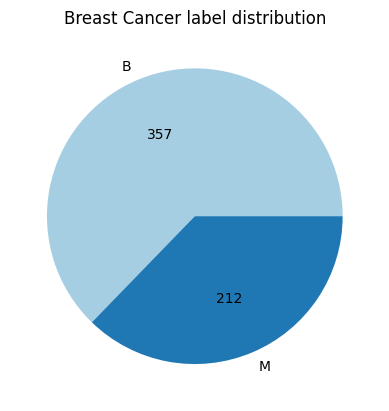

In [21]:
label_dist(breast_cancer_labels, 'Breast Cancer')

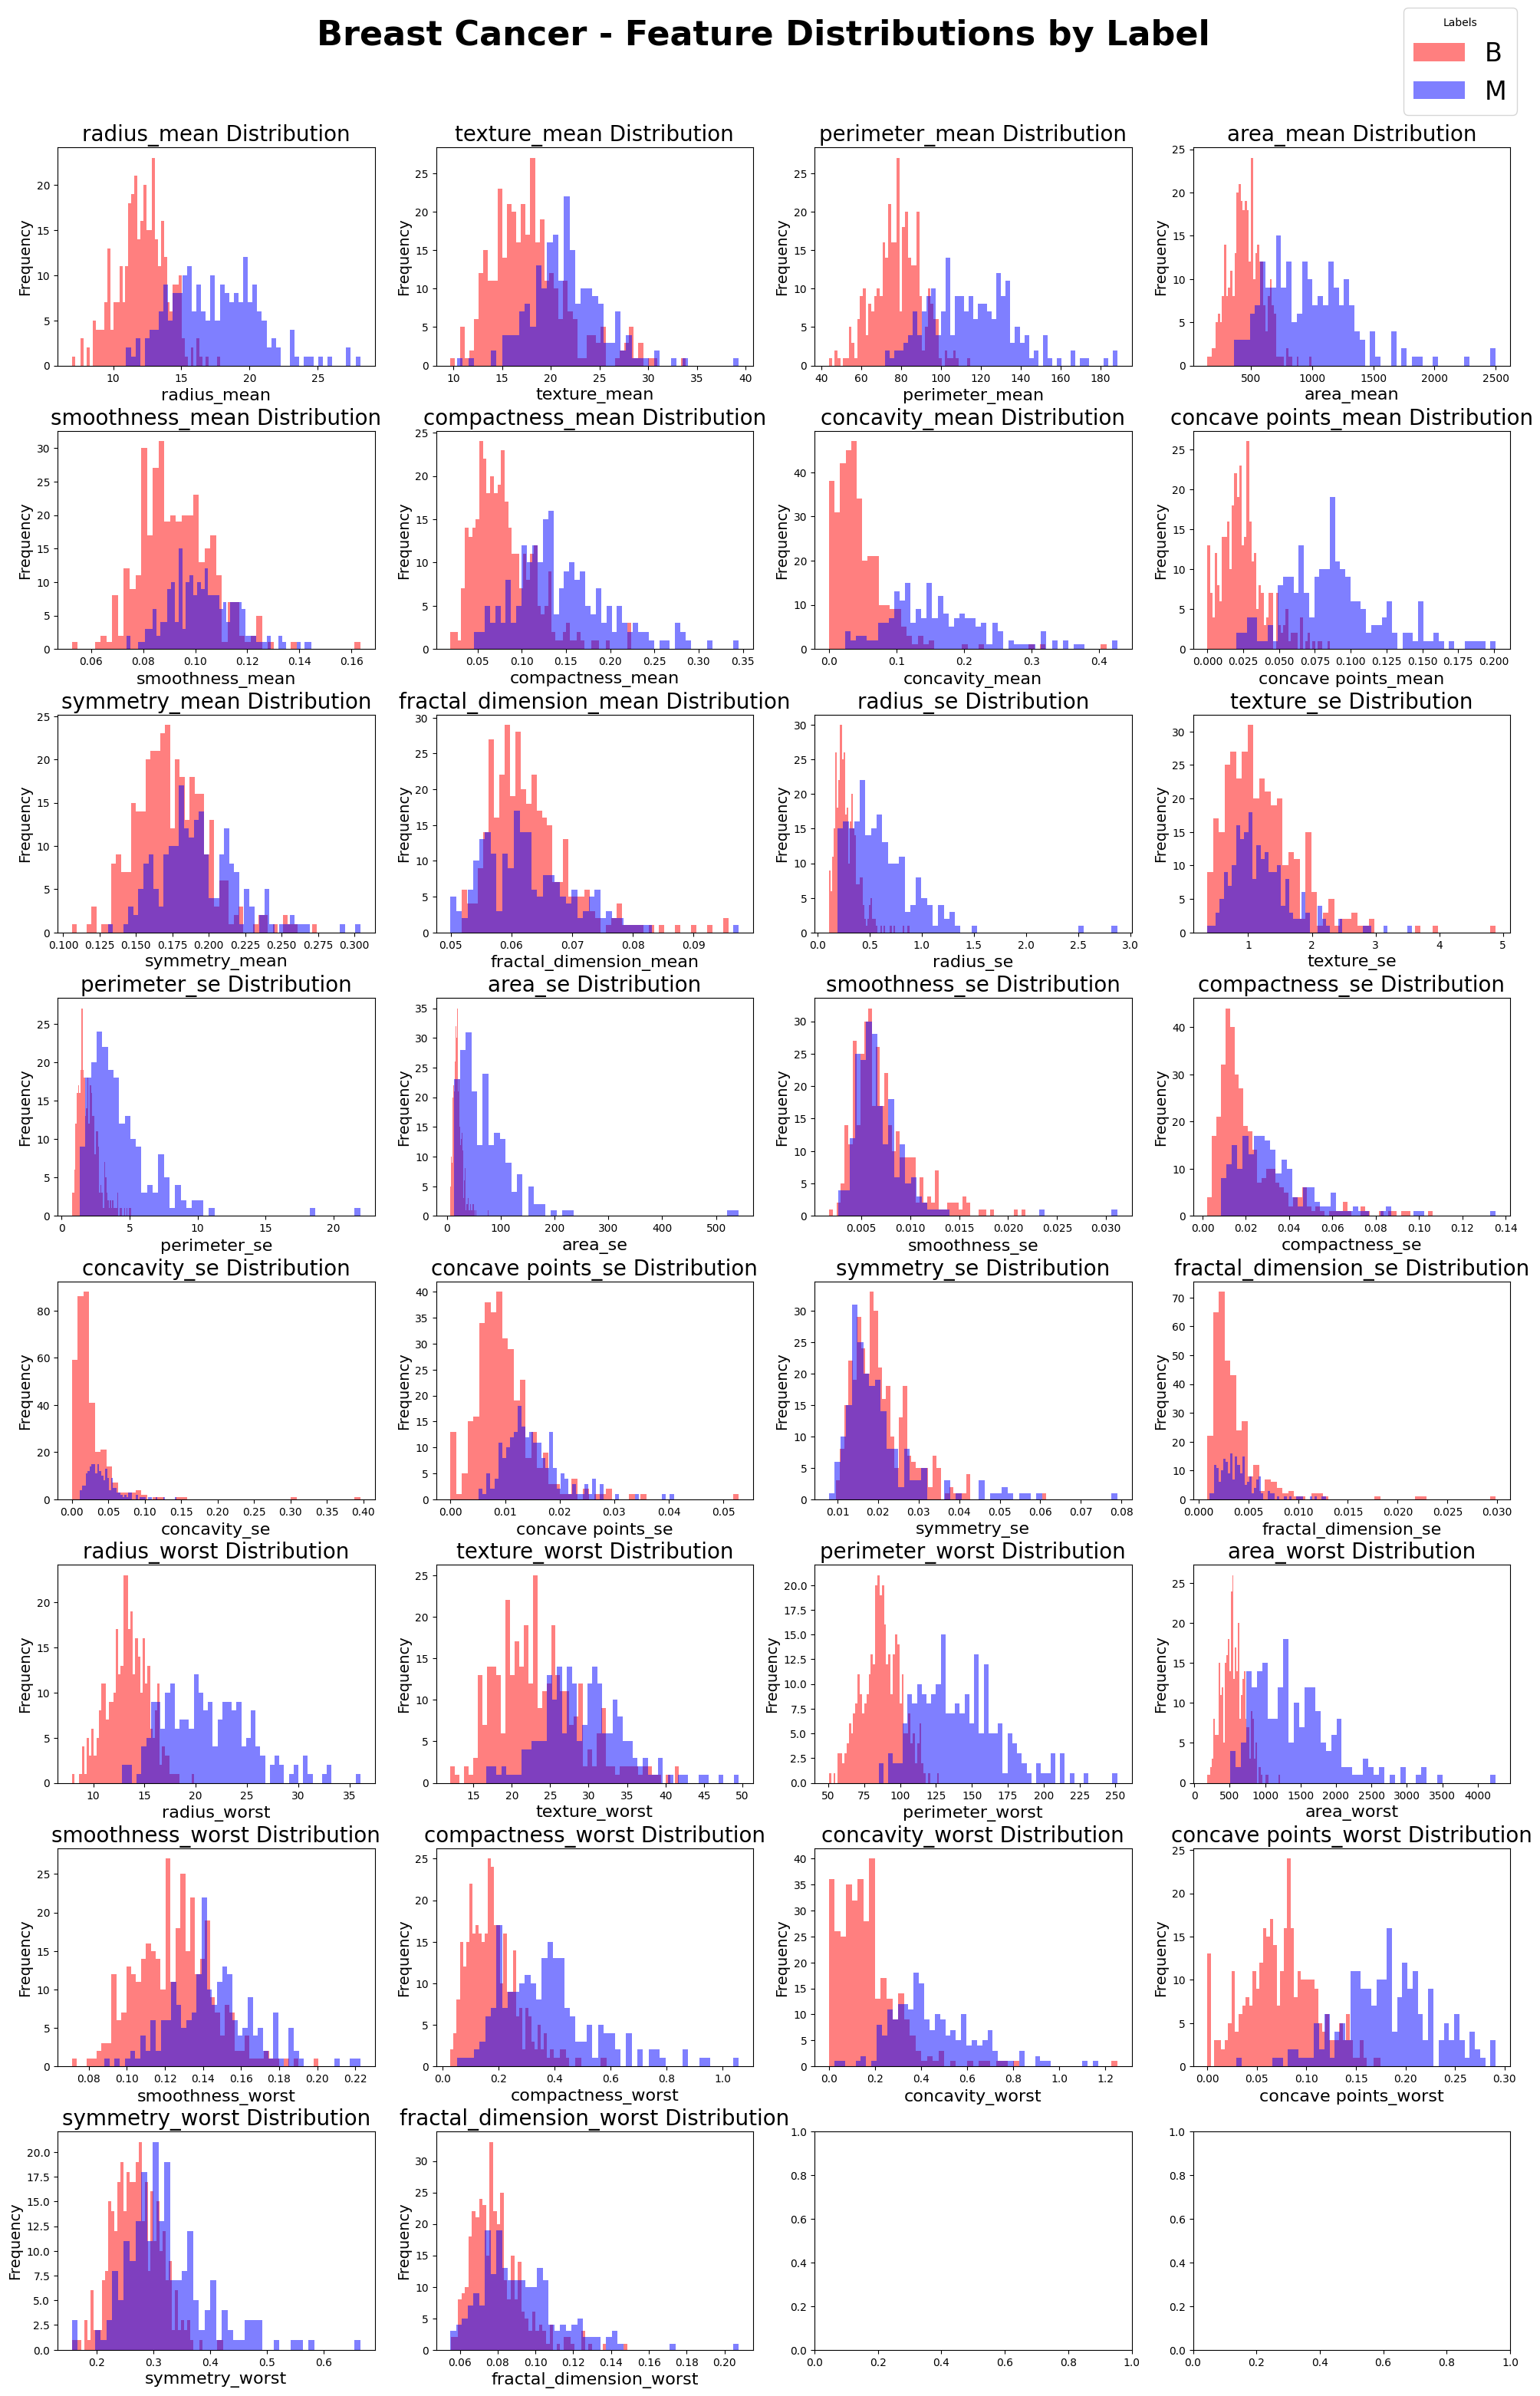

In [22]:
# Check distribution of each feature depending on label
featureDist (breast_cancer_features, breast_cancer_labels, 'Breast Cancer', 0.98)

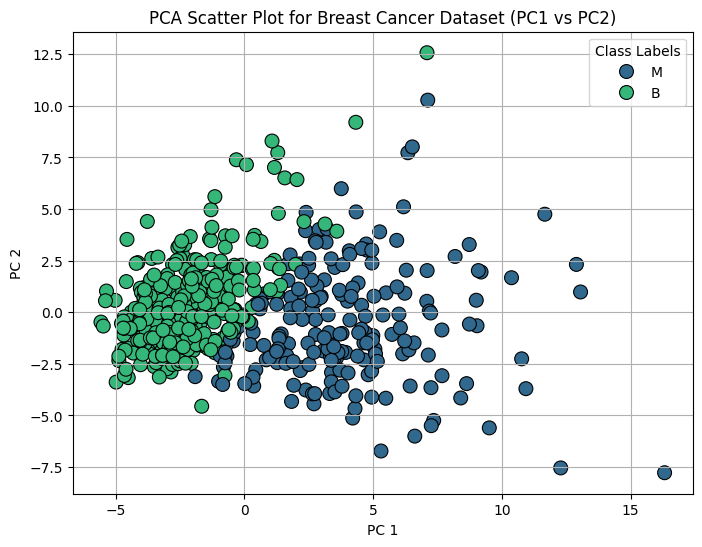

In [23]:
# Perform PCA
PC_Analysis(breast_cancer_features, 'Breast Cancer', breast_cancer_labels, False)

Advanced EDA for BBB dataset

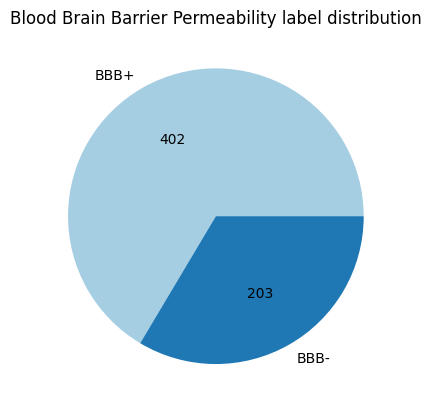

In [24]:
label_dist (blood_brain_barrier_labels, 'Blood Brain Barrier Permeability')

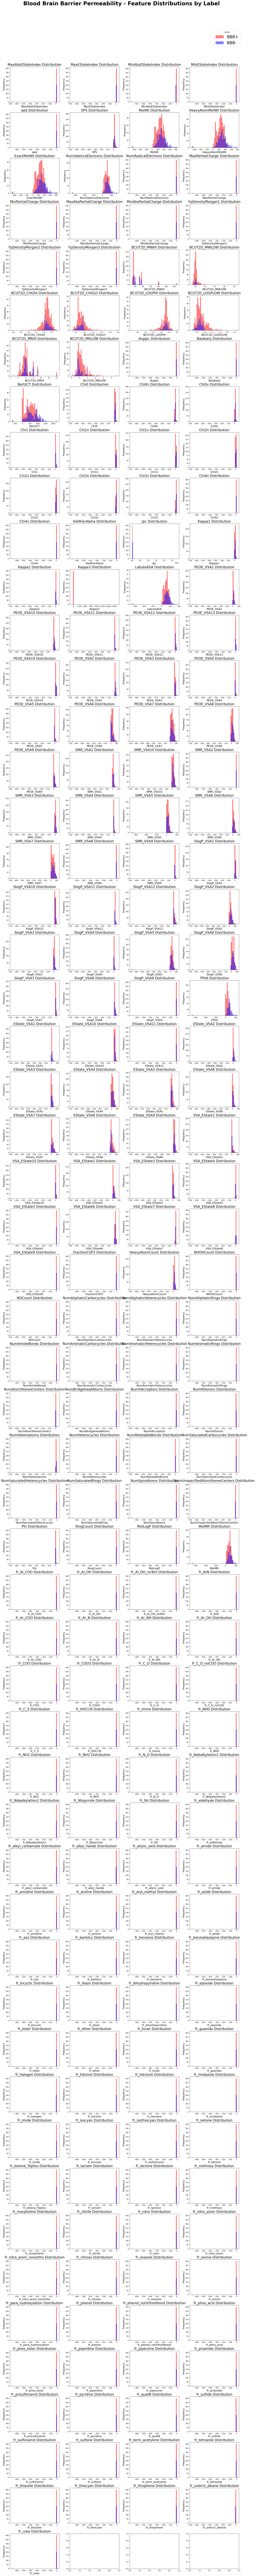

In [25]:
# Check distribution of each feature depending on label
featureDist (BBB_desc_df_cleaned, blood_brain_barrier_labels, 'Blood Brain Barrier Permeability', 0.96)

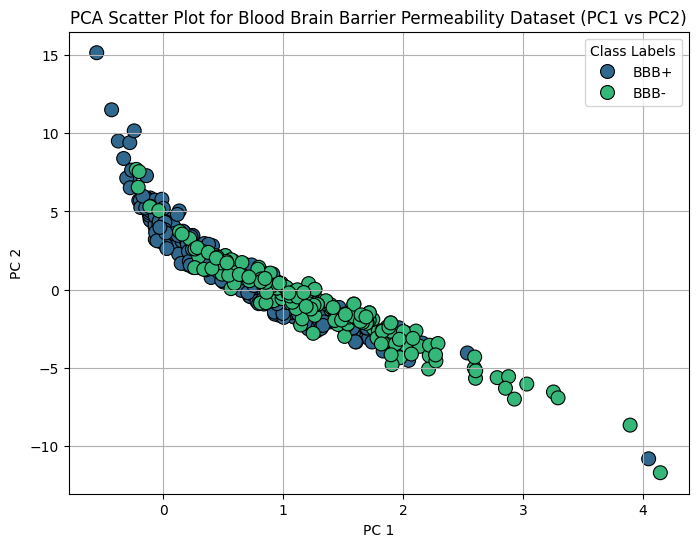

In [26]:
# Perform PCA
PC_Analysis(BBB_desc_df_cleaned, 'Blood Brain Barrier Permeability', blood_brain_barrier_labels, True)

Active Machine Learning by querying uncertainty

AL ML Function

In [27]:
def AL_RF_Uncertain_Query(features, labels):
    MCC_Sample_Scores = pd.DataFrame()
    F1_Sample_Scores = pd.DataFrame()
    rf_features = pd.DataFrame()

    Sample_States = ['First 5', 1, 10, 42, 50, 100]

    # initialise our learner #
    clf_rf = RandomForestClassifier(n_estimators=250, random_state=42, criterion='entropy', 
                                    min_samples_split=5)

    # Calucates split fraction for labeled datset
    def calc_fractions(x_sum_lab, sum_features):
        return (len(x_sum_lab)/len(sum_features))

    # Run cycles
    for state in Sample_States:
        print ('Current State:', state)

        # Define data splits #
        if isinstance(state, str):
            # First 5 samples as labelled data
            X_lab = features.iloc[:5]  # First 5 rows (features)
            y_lab = labels.iloc[:5]    # First 5 rows (labels)
            # Remaining data as unlabeled
            X_unlab = features.iloc[5:]  
            y_unlab = labels.iloc[5:]  
        else:
            # Pick 5 random samples according to random state and stratify to ensure the proportion of classes in the labeled set matches the full dataset.
            X_lab, X_unlab, y_lab, y_unlab = train_test_split(features, labels, train_size= 5,
                                                            random_state=state, stratify=labels) 

        # Scale the data #
        scaler = StandardScaler() # initialise standard scaler
        X_lab_scaled = np.array(scaler.fit_transform(X_lab))  # scale labeled features
        X_unlab_scaled = np.array(scaler.transform(X_unlab))  # Scale unlabeled features

        # turn labels into numpy array
        y_lab = np.array(y_lab)
        y_unlab = np.array(y_unlab)

        mcc_scores, f1_per_iteration = [], []

        # calculate fraction of data used for training
        labeled_data_fraction = calc_fractions(X_lab_scaled, features) 

        # Start iteration 
        while labeled_data_fraction < 0.8: # continue to cycle until training is no more than 80% of total sample size 

            # train classifier for this iteration
            clf_rf.fit(X_lab_scaled, y_lab)
            y_pred = clf_rf.predict(X_unlab_scaled) # make predictions

            # Metrics processing
            mcc_scores.append(matthews_corrcoef(y_unlab, y_pred))
            f1_per_iteration.append(f1_score(y_unlab, y_pred, average='weighted') )

            # Determine probability distributions
            pred_q1 = clf_rf.predict_proba(X_unlab_scaled)
            uncertainty = (1-np.max(pred_q1, axis = 1)) * 100 # Calculated uncertainty -- Convert PD to uncertainty
            q_indexes = np.argsort(uncertainty)[-20:] # Find 20 most uncertain samples in ascending order

            # Add most uncertain cample to training set
            X_lab_scaled = np.vstack((X_lab_scaled, X_unlab_scaled[q_indexes])) # Place most uncertain samples underneath labeled data
            y_lab = np.concatenate((y_lab, y_unlab[q_indexes])) # Place labels of most uncertain samples in labelled data
            
            
            labeled_data_fraction = calc_fractions(X_lab_scaled, features) # Update fraction
            if labeled_data_fraction > 0.8: # break loop if fraction > 80%
                break

            # remove the queried samples from the test set
            X_unlab_scaled = np.delete(X_unlab_scaled, q_indexes, axis = 0)
            y_unlab = np.delete(y_unlab, q_indexes, axis = 0)

            ### End of while loop ###

        if isinstance(state, str):
            MCC_Sample_Scores['First Five Samples'] = mcc_scores
            F1_Sample_Scores['First Five Samples'] = f1_per_iteration
        else:
            MCC_Sample_Scores['Random State ' + str(state)] = mcc_scores
            F1_Sample_Scores['Random State ' + str(state)] = f1_per_iteration

    #### End of for loop ####

    # Extract feature importances for this iteration
    features_importances = clf_rf.feature_importances_
    # Get the feature names from the dataset
    Features = features.columns
    # Sort feature importances in descending order and get the indices of the top features
    indices = np.argsort(features_importances)[::-1][:20]  # Select top 20 indices
    # Get the names of the top 20 features
    top_features = Features[indices]
    top_importances = features_importances[indices]  # Corresponding importance values

    # Store feature importance data into rf_features DataFrame
    rf_features['Feature Names'] = top_features
    rf_features['Importance'] = top_importances

    print ("Finished")



    return (MCC_Sample_Scores, F1_Sample_Scores, rf_features)

Individual Dataset analysis functions

In [28]:
def Individual_statAnalysis(MCC_Scores, F1_Scores, name):

    # Process MCC scores:
    MCC_First = MCC_Scores.iloc[:,0] # get MCCs for first 5 sample state
    MCC_random = MCC_Scores.drop(MCC_Scores.columns[0], axis = 1)  # get columns for random sample states
    MCC_random_Mean = MCC_random.mean(axis = 1) # Calculate mean MCC per iteration for random sample states

    # Process F1 scores
    F1_First = F1_Scores.iloc[:,0] # Get F1 scores for first 5 sample state
    F1_random = F1_Scores.drop(F1_Scores.columns[0], axis = 1) # get f1 scores for all random states for 5 random samples
    F1_random_Mean = F1_random.mean(axis = 1) # Calculate mean F1 per iteration for random sample states

    iterations = range(len(MCC_First))  # get list for number of iterations performed

    # Do t-test to compare 1st 5 to random sampling states
    print ('MCC t-test')
    print(ttest_rel(MCC_First, MCC_random_Mean))

    # Do t-test to compare 1st 5 to random sampling states
    print ('F1 t-test')
    print(ttest_rel(F1_First, F1_random_Mean))

    # Plot mean MCC per iteration with standard deviation for random state vs MCC of first 5 samples
    MCC_random_STD = MCC_random.std(axis=1) # calculate std per iteration
    plt.errorbar(iterations, MCC_random_Mean, yerr = MCC_random_STD, fmt='-o', capsize=5, color='red', label="Mean MCC for random states")
    plt.errorbar(iterations, MCC_First, fmt='-o', capsize=5, color='blue', label="MCC for First 5 samples")
    plt.xlabel('Iteration')
    plt.ylabel('MCC score')
    plt.title ('Random Forest Active learning MCC scores for ' + name)
    plt.legend()
    plt.show()

    # Plot mean MCC per iteration with standard deviation for random state vs MCC of first 5 samples
    F1_random_STD = F1_random.std(axis=1) # calculate std per iteration
    plt.errorbar(iterations, F1_random_Mean, yerr = F1_random_STD, fmt='-o', capsize=5, color='red', label="Mean F1 for random states")
    plt.errorbar(iterations, F1_First, fmt='-o', capsize=5, color='blue', label="F1 for First 5 samples")
    plt.xlabel('Iteration')
    plt.ylabel('F1 score')
    plt.title ('Random Forest Active learning F1 scores for ' + name)
    plt.legend()
    plt.show()

In [29]:
def FeatureImportance(Features, name):
    # Process feature importance by creating graph of top 20 features
    # Create graph of top 20 features
    plt.title("Top 20 Feature Importance for " + name + " dataset")  # Update title
    plt.bar(Features['Feature Names'], Features['Importance'])
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.xticks(range(len(Features)), Features['Feature Names'], rotation=45, ha="right")
    plt.show()

Comparative analysis function

In [30]:
def t_tests(list1, list2):
    t_stat, p_value = ttest_ind(list1, list2, equal_var=False)  # Welch’s t-test
    print("t-statistic:", t_stat)
    print("p-value:", p_value)

def Comparative_statAnalysis(MCC_Scores_1st, F1_Scores_1st, Dataset1_name, MCC_Scores_2nd, F1_Scores_2nd, Dataset2_name):
    # Do the comparison between 1st sample scores for both datasets

    # Process MCC scores for dataset 1:
    MCC_First5_1st = MCC_Scores_1st.iloc[:,0] # get MCCs for first 5 sample state
    MCC_random_1st = MCC_Scores_1st.drop(MCC_Scores_1st.columns[0], axis = 1)  # get columns for random sample states
    
    MCC_random_Mean_1st = MCC_random_1st.mean(axis = 1) # Calculate mean MCC per iteration for random sample states
    MCC_random_STD_1st = MCC_random_1st.std(axis=1) # calculate std per iteration for 1st dataset

    # Process MCC scores for dataset 2:
    MCC_First5_2nd = MCC_Scores_2nd.iloc[:,0] # get MCCs for first 5 sample state
    MCC_random_2nd = MCC_Scores_2nd.drop(MCC_Scores_2nd.columns[0], axis = 1)  # get columns for random sample states
    
    MCC_random_Mean_2nd = MCC_random_2nd.mean(axis = 1) # Calculate mean MCC per iteration for random sample states
    MCC_random_STD_2nd = MCC_random_2nd.std(axis=1) # calculate std per iteration for 1st dataset

    # Process F1 scores for dataset 1
    F1_First5_1st = F1_Scores_1st.iloc[:,0] # Get F1 scores for first 5 sample state
    F1_random_1st = F1_Scores_1st.drop(F1_Scores_1st.columns[0], axis = 1) # get f1 scores for all random states for 5 random samples

    F1_random_Mean_1st = F1_random_1st.mean(axis = 1) # Calculate mean F1 per iteration for random sample states
    F1_random_STD_1st = F1_random_1st.std(axis=1) # calculate std per iteration for 1st dataset

    # Process F1 scores for dataset 2
    F1_First5_2nd = F1_Scores_2nd.iloc[:,0] # Get F1 scores for first 5 sample state
    F1_random_2nd = F1_Scores_2nd.drop(F1_Scores_2nd.columns[0], axis = 1) # get f1 scores for all random states for 5 random samples
    
    F1_random_Mean_2nd = F1_random_2nd.mean(axis = 1) # Calculate mean F1 per iteration for random sample states
    F1_random_STD_2nd = F1_random_2nd.std(axis=1) # calculate std per iteration for 2nd dataset
    
    # Find which dataset had the most iterations and form a list for number of iterations performed
    iterations_1st = range(len(MCC_Scores_1st))
    iterations_2nd = range(len(MCC_Scores_2nd))

    # T-test for MCC and F1 scores:
    # MCC #
    # Do t-test to compare MCC scores of 1st 5 samples of both datasets
    print('MCC Unpaired T-test for 1st 5 samples between datasets:')
    t_tests(MCC_First5_1st, MCC_First5_2nd)
    # Do t-test to compare MCC scores of mean random sampling states of both datasets
    print('MCC Unpaired T-test for mean random samples between datasets:')
    t_tests(MCC_random_Mean_1st, MCC_random_Mean_2nd)

    # F1 #
    # Do t-test to compare F1 scores of 1st 5 to random sampling states
    print('F1 Unpaired T-test for 1st 5 samples between datasets:')
    t_tests(F1_First5_1st, F1_First5_2nd)
    # Do t-test to compare MCC scores of mean random sampling states of both datasets
    print('F1 Unpaired T-test for mean random samples between datasets:')
    t_tests(F1_random_Mean_1st, F1_random_Mean_2nd)


    # Plotting MCC scores:
    # Plot mean MCC scores for 1st 5 samples for both datasets
    plt.errorbar(iterations_1st, MCC_First5_1st, fmt='-o', capsize=5, color='red', label=Dataset1_name)
    plt.errorbar(iterations_2nd, MCC_First5_2nd, fmt='-o', capsize=5, color='blue', label=Dataset2_name)
    plt.xlabel('Iteration')
    plt.ylabel('MCC score')
    plt.title ('Random Forest Active learning MCC scores for 1st 5 samples')
    plt.legend()
    plt.show()
    # Plot mean MCC score per iteration with standard deviation for mean random samples for both datasets
    plt.errorbar(iterations_1st, MCC_random_Mean_1st, yerr = MCC_random_STD_1st, fmt='-o', capsize=5, color='red', label=Dataset1_name)
    plt.errorbar(iterations_2nd, MCC_random_Mean_2nd, yerr = MCC_random_STD_2nd, fmt='-o', capsize=5, color='blue', label=Dataset2_name)
    plt.xlabel('Iteration')
    plt.ylabel('MCC score')
    plt.title ('Random Forest Active learning MCC scores for mean random samples')
    plt.legend()
    plt.show()

    # Plot F1 scores for 1st 5 samples for both datasets
    plt.errorbar(iterations_1st, F1_First5_1st, fmt='-o', capsize=5, color='red', label=Dataset1_name)
    plt.errorbar(iterations_2nd, F1_First5_2nd, fmt='-o', capsize=5, color='blue', label=Dataset2_name)
    plt.xlabel('Iteration')
    plt.ylabel('F1 score')
    plt.title ('Random Forest Active learning F1 scores for 1st 5 sampls')
    plt.legend()
    plt.show()
    # Plot mean F1 score per iteration with standard deviation for mean random samples for both datasets
    plt.errorbar(iterations_1st, F1_random_Mean_1st, yerr = F1_random_STD_1st, fmt='-o', capsize=5, color='red', label=Dataset1_name)
    plt.errorbar(iterations_2nd, F1_random_Mean_2nd, yerr = F1_random_STD_2nd, fmt='-o', capsize=5, color='blue', label=Dataset2_name)
    plt.xlabel('Iteration')
    plt.ylabel('F1 score')
    plt.title ('Random Forest Active learning F1 scores for mean random samples')
    plt.legend()
    plt.show()

Run AL functions

In [31]:
# For breast cancer
BC_MCC, BC_F1, BC_RF_Features = AL_RF_Uncertain_Query(breast_cancer_features, breast_cancer_labels)

Current State: First 5
Current State: 1
Current State: 10
Current State: 42
Current State: 50
Current State: 100
Finished


In [32]:
# For blood brain barrier
BBB_MCC, BBB_F1, BBB_RF_Features = AL_RF_Uncertain_Query(BBB_desc_df_cleaned, blood_brain_barrier_labels)

Current State: First 5
Current State: 1
Current State: 10
Current State: 42
Current State: 50
Current State: 100
Finished


Run Stat analysis for individual datasets

MCC t-test
TtestResult(statistic=np.float64(2.0322955761090125), pvalue=np.float64(0.05436973991385978), df=np.int64(22))
F1 t-test
TtestResult(statistic=np.float64(-0.530158959173004), pvalue=np.float64(0.6013122932428487), df=np.int64(22))


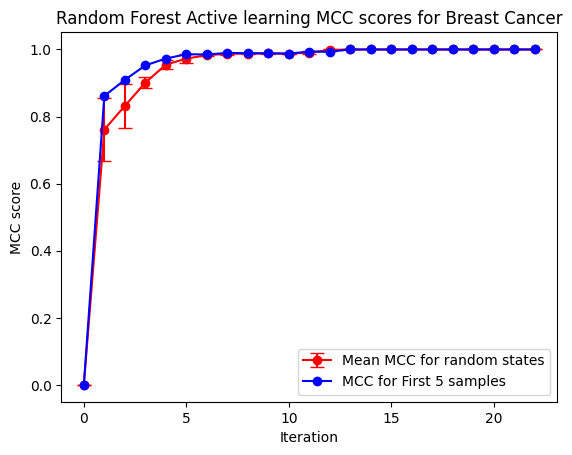

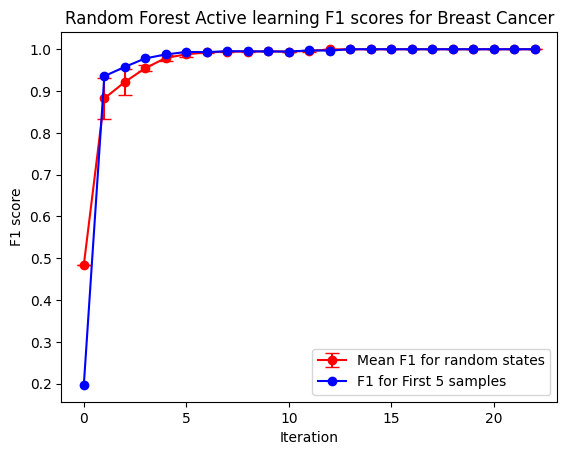

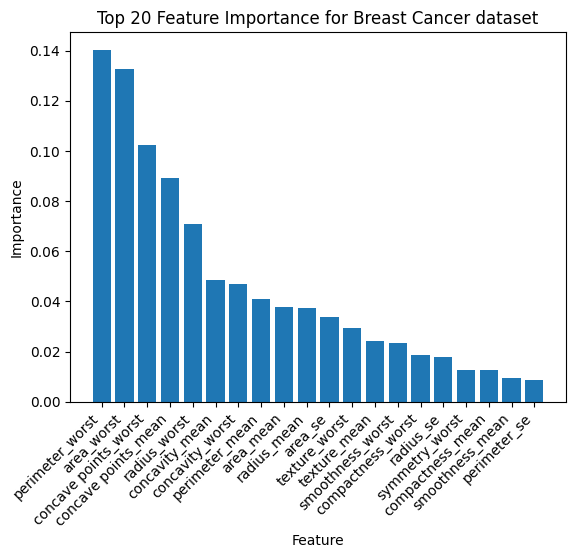

In [33]:
# Show results of statistical analysis for breast cancer dataset
Individual_statAnalysis(BC_MCC, BC_F1, 'Breast Cancer')
FeatureImportance(BC_RF_Features, 'Breast Cancer')


MCC t-test
TtestResult(statistic=np.float64(1.44709956953909), pvalue=np.float64(0.1613621473169255), df=np.int64(23))
F1 t-test
TtestResult(statistic=np.float64(-1.3937734881315602), pvalue=np.float64(0.17670806057904168), df=np.int64(23))


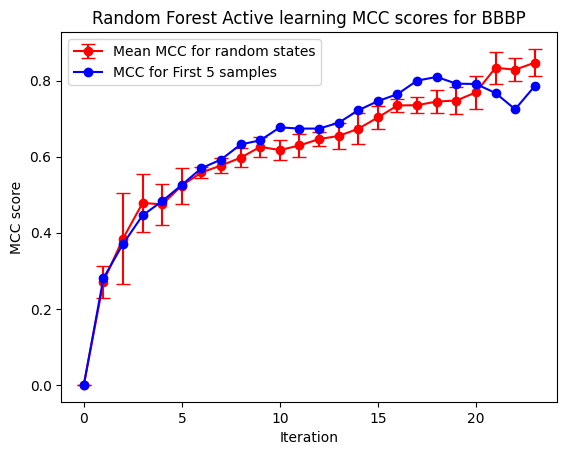

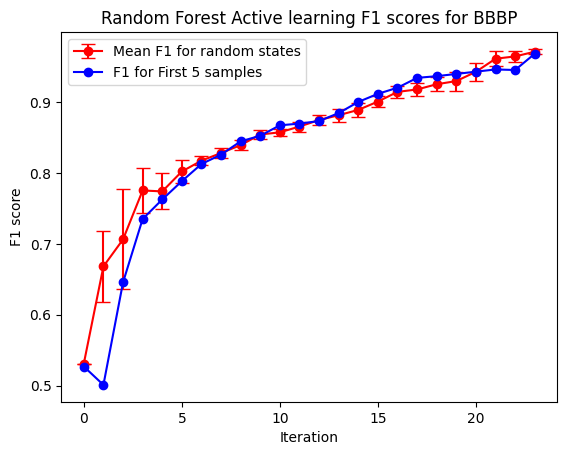

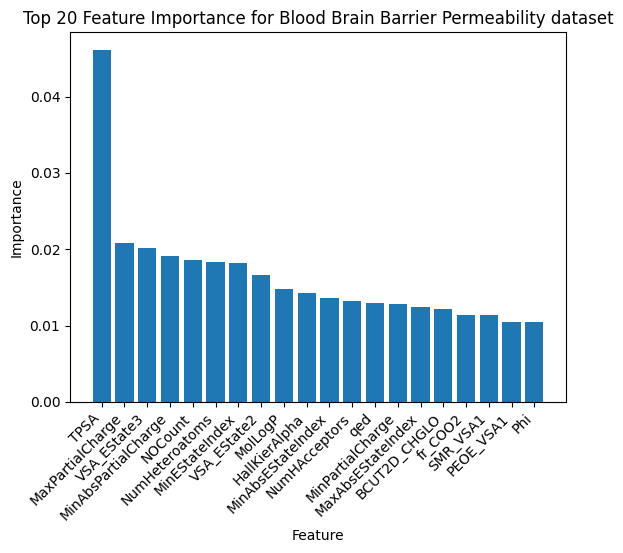

In [34]:
# BBB stat results
Individual_statAnalysis(BBB_MCC, BBB_F1, 'BBBP')
FeatureImportance(BBB_RF_Features, "Blood Brain Barrier Permeability")


Run Analysis comparing both datasets

MCC Unpaired T-test for 1st 5 samples between datasets:
t-statistic: 5.380709095425674
p-value: 2.6410994532732266e-06
MCC Unpaired T-test for mean random samples between datasets:
t-statistic: 5.381848065371831
p-value: 2.6802392264836443e-06
F1 Unpaired T-test for 1st 5 samples between datasets:
t-statistic: 2.728657463001449
p-value: 0.009315374474794738
F1 Unpaired T-test for mean random samples between datasets:
t-statistic: 3.6916732495900972
p-value: 0.0006040420282168592


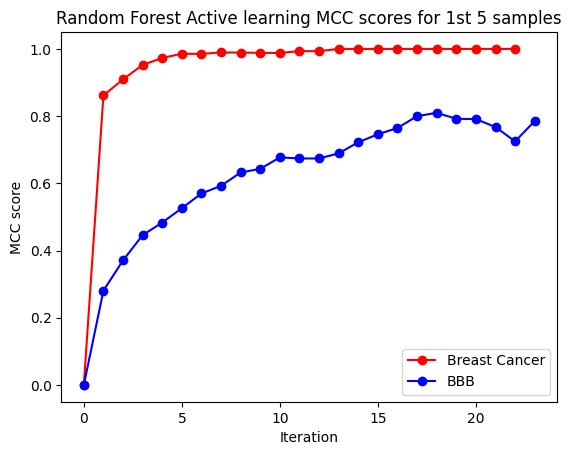

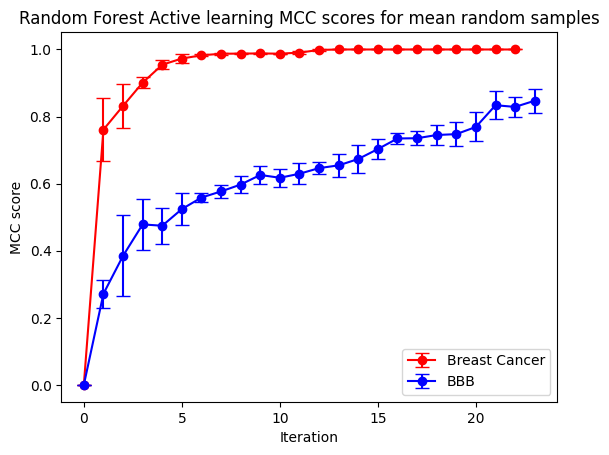

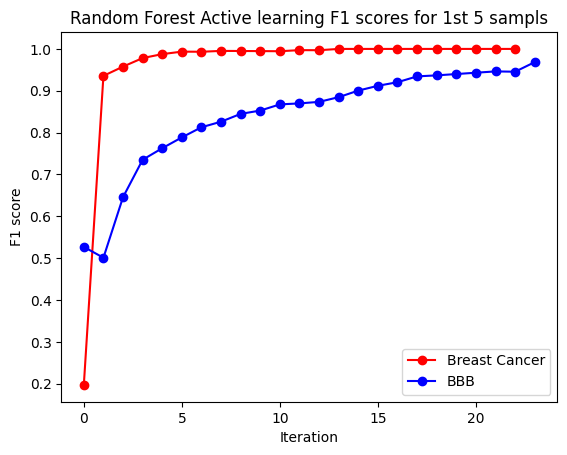

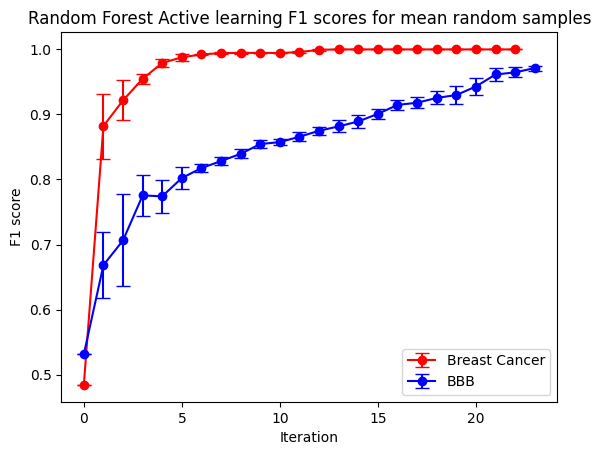

In [35]:
# Compare results of both datasets and anlyse them
Comparative_statAnalysis(BC_MCC, BC_F1, 'Breast Cancer', BBB_MCC, BBB_F1, 'BBB')